# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Lung Cancer Analysis & Prediction</p>

<p style="text-align:center; ">
<img src="https://st.depositphotos.com/1909187/4810/i/450/depositphotos_48100511-stock-photo-lung-cancer-tumor-detail.jpg" style='width: 300px; height: 300px;'>
</p>


<p style="text-align:justify; ">
    
Lung cancer is a type of cancer that begins in the lungs. Lungs are two spongy organs in our chest that take in oxygen when we inhale and release carbon dioxide when we exhale.
Lung cancer is the leading cause of cancer deaths worldwide.<br>
<br>
People who smoke have the greatest risk of lung cancer, though lung cancer can also occur in people who have never smoked. The risk of lung cancer increases with the length of time and number of cigarettes someone's smoked. If someone quits smoking, even after smoking for many years, he/she can significantly reduce the chances of developing lung cancer.
</p> 


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
    

    
|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|1   | [<font color="#0f4c5c"> Importing Libraries</font>](#1)                   |12   | [<font color="#0f4c5c"> Correlation Heatmap</font>](#12)   |     
|2   | [<font color="#0f4c5c"> About Dataset</font>](#2)                         |13  | [<font color="#0f4c5c"> Preprocessing For Classification</font>](#13)|      
|3   | [<font color="#0f4c5c"> Basic Exploration</font>](#3)                     |14  | [<font color="#0f4c5c"> Logistic Regression Model</font>](#14)   |    
|4   | [<font color="#0f4c5c"> Dataset Summary</font>](#4)                       |15  | [<font color="#0f4c5c"> Gaussian Naive Bayes Model</font>](#15)    |       
|5   | [<font color="#0f4c5c"> Digging Deeper</font>](#5)      |16  | [<font color="#0f4c5c"> Bernoulli Naive Bayes Model</font>](#16)  |     
|6   | [<font color="#0f4c5c"> Custom Palette For Visualization</font>](#6)              |17  | [<font color="#0f4c5c"> Support Vector Machine Model</font>](#17)     |     
|7   | [<font color="#0f4c5c"> Positive Lung Cancer Cases</font>](#7)              |18  | [<font color="#0f4c5c"> Random Forest Model</font>](#18)     |
|8   | [<font color="#0f4c5c"> Positive Cases' Age Distribution</font>](#8)              |19  | [<font color="#0f4c5c"> K Nearest Neighbors Model</font>](#19)     |
|9   | [<font color="#0f4c5c"> Positive Cases' Gender Distribution</font>](#9)              |20  | [<font color="#0f4c5c"> Extreme Gradient Boosting Model</font>](#20)     |
|10   | [<font color="#0f4c5c"> Gender-wise Positive Cases' Reasons</font>](#10)              |21  | [<font color="#0f4c5c"> Neural Network Architecture</font>](#21)     |
|11   | [<font color="#0f4c5c"> Gender-wise Positive Cases' Symptoms</font>](#11)              |22  | [<font color="#0f4c5c"> Thank You</font>](#22)     |    
  

<a id="1"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* **GENDER :** M [Male] , F [Female]
* **AGE :** Age of patients
* **SMOKING :** 2 [Yes] , 1 [No] 
* **YELLOW_FINGERS :** 2 [Yes] , 1 [No]  
* **ANXIETY :** 2 [Yes] , 1 [No] 
* **PEER_PRESSURE :** 2 [Yes] , 1 [No] 
* **CHRONIC DISEASE :** 2 [Yes] , 1 [No] 
* **FATIGUE :** 2 [Yes] , 1 [No] 
* **ALLERGY :** 2 [Yes] , 1 [No] 
* **WHEEZING :** 2 [Yes] , 1 [No] 
* **ALCOHOL CONSUMING :** 2 [Yes] , 1 [No] 
* **COUGHING :** 2 [Yes] , 1 [No] 
* **SHORTNESS OF BREATH :** 2 [Yes] , 1 [No] 
* **SWALLOWING DIFFICULTY :** 2 [Yes] , 1 [No] 
* **CHEST PAIN :** 2 [Yes] , 1 [No] 
* **LUNG_CANCER :** YES [Positive] , NO [Negative] 

In [11]:
data = pd.read_csv("survey lung cancer.csv")

In [12]:
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})

data_temp.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})    

Let's create a new dataframe containing only positive cases data.

In [13]:
data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_pos.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

In [15]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data["GENDER"] = data["GENDER"].replace({"M" : "Male" , "F" : "Female"})
data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])
data.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE", "YELLOW_FINGERS" : "YELLOW FINGERS", "PEER_PRESSURE" : "PEER PRESSURE", "LUNG_CANCER" : "LUNG CANCER", "FATIGUE " : "FATIGUE", "ALLERGY " : "ALLERGY"}, inplace=True)
data = data[["AGE","MALE","FEMALE","ALCOHOL CONSUMING","CHEST PAIN","SHORTNESS OF BREATH","COUGHING","PEER PRESSURE","CHRONIC DISEASE","SWALLOWING DIFFICULTY","YELLOW FINGERS","ANXIETY","FATIGUE","ALLERGY","WHEEZING","LUNG CANCER"]]
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

In [18]:
x = data.drop("LUNG CANCER", axis = 1)
y = data["LUNG CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (247, 15), (247,)
Shape of testing data : (62, 15), (62,)


In [84]:
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[ 4  8]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56


The Accuracy of Random Forest Classifier is 85.71 %


In [86]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_conf = confusion_matrix(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{xgb_conf}")
print(f"\nClassification Report : \n\n{xgb_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")

Confusion Matrix : 

[[ 7  5]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56


The Accuracy of Extreme Gradient Boosting Classifier is 91.07 %


In [87]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

regularization_parameter = 0.003

neural_model = Sequential([tf.keras.layers.Dense(units=32, input_dim=(x_train.shape[-1]), activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=128, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(units=16,activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=1, activation="sigmoid")
                    ])

print(neural_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 13,025
Trainable params: 13,025
Non-trainable params: 0
__________________________________________________

In [88]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy") == 1.0):
            print("\nAccuracy is 100% so canceling training!")
            self.model.stop_training = True

callbacks = myCallback()


neural_model.compile(optimizer = Adam(learning_rate = 0.001), 
                     loss = "binary_crossentropy", 
                     metrics = ["accuracy"])

history = neural_model.fit(x_train, y_train,
                           epochs = 150,
                           verbose = 1,
                           batch_size = 64,
                           validation_data = (x_test, y_test),
                           callbacks = [callbacks])

Epoch 1/150
4/4 [==============================] - 1s 92ms/step - loss: 4.4587 - accuracy: 0.5727 - val_loss: 4.3342 - val_accuracy: 0.7857
Epoch 2/150
4/4 [==============================] - 0s 18ms/step - loss: 4.2574 - accuracy: 0.8636 - val_loss: 4.1814 - val_accuracy: 0.7857
Epoch 3/150
4/4 [==============================] - 0s 18ms/step - loss: 4.0778 - accuracy: 0.8818 - val_loss: 4.0458 - val_accuracy: 0.7857
Epoch 4/150
4/4 [==============================] - 0s 16ms/step - loss: 3.9063 - accuracy: 0.8818 - val_loss: 3.9211 - val_accuracy: 0.7857
Epoch 5/150
4/4 [==============================] - 0s 16ms/step - loss: 3.7662 - accuracy: 0.8818 - val_loss: 3.8074 - val_accuracy: 0.7857
Epoch 6/150
4/4 [==============================] - 0s 16ms/step - loss: 3.6402 - accuracy: 0.8818 - val_loss: 3.7000 - val_accuracy: 0.7857
Epoch 7/150
4/4 [==============================] - 0s 17ms/step - loss: 3.5040 - accuracy: 0.8818 - val_loss: 3.5934 - val_accuracy: 0.7857
Epoch 8/150
4/4 [===

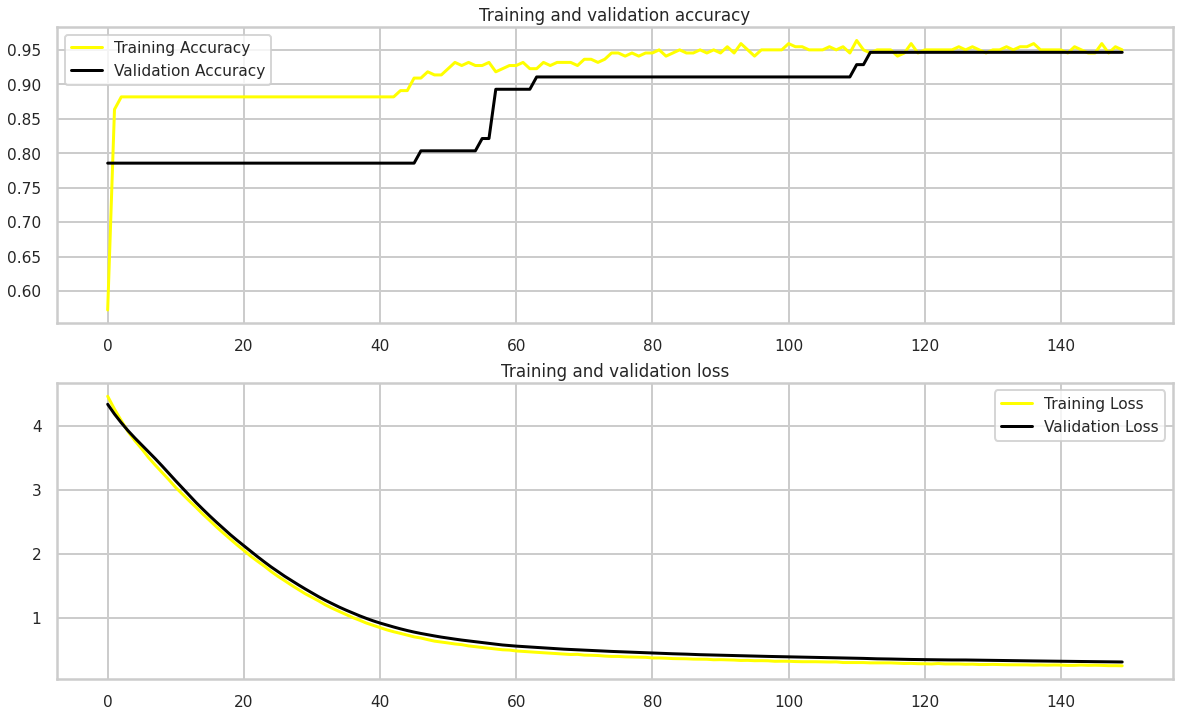

In [89]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc)) # number of epochs

plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
plt.plot(epochs, acc, "yellow", label= "Training Accuracy")
plt.plot(epochs, val_acc, "black", label= "Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.subplot(2,1,2)
plt.plot(epochs, loss, "yellow", label= "Training Loss")
plt.plot(epochs, val_loss, "black", label= "Validation Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

<a id="22"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>


<p>
<h3><font color="#0f4c5c">If you liked this notebook please upvote. Your feedback will be highly appreciated.</font></h3>

<br>

<h4><b>Author :</b></h4>

<h3>Hasib Al Muzdadid</h3>

<b>👉Shoot me mails :</b> muzdadid@gmail.com<br>
<b>👉Connect on LinkedIn :</b> https://www.linkedin.com/in/hasibalmuzdadid <br>
<b>👉Explore Github :</b> https://github.com/HasibAlMuzdadid    
    
</p> 
